# **Financial Applicactions with ML & AI**

<img style="float: right;" src="https://github.com/torreblanca99/course_financial_applications/blob/develop/docs/img/logo_bourbaki.png?raw=1" width="100"/>

## **Module II:** Value Risk
#### Topic:  Black-Scholes for Options Value

##### Name: Julio César Avila Torreblanca

- **Objective**: apply Black Scholes to value options.

- **Contents**:
    - Notes:
        - Black Scholes
    - Code:
        1. Libraries and parameters
        2. Read Data
        3. Preparing Data
        4. Modeling
        5. Evaluation
----

# Class Notes: Financial Options and Black-Scholes Model

## Financial Options

### Definition

A financial option is a contract that grants the holder the right, but not the obligation, to buy or sell an asset at a predetermined price before or at a specified expiration date. Options are used primarily for hedging risks or for speculative purposes.

### Types of Options

Options can be broadly categorized based on the underlying asset, exercise style, and position (call or put). The exercise style primarily divides options into European-style or American-style.

## European Options

### Definition

European options are a type of financial option that can only be exercised at the expiration date, unlike American options, which can be exercised at any time before expiration. This characteristic often makes European options simpler to analyze and price compared to their American counterparts.

### Key Characteristics

- **Exercise Timing**: Can only be exercised at expiration.
- **Pricing Models**: Often use the Black-Scholes model for valuation.
- **Underlying Assets**: Typically involve stocks, indices, or other securities.

## Call and Put Options

### Call Option

A call option gives the holder the right, but not the obligation, to purchase a specific quantity of an asset at a predetermined strike price on or before the expiration date (for American options) or only at expiration (for European options).

- **Profit Potential**: Unlimited, as the underlying asset’s price can theoretically increase indefinitely.
- **Risk**: Limited to the premium paid for the option.

### Put Option

A put option grants the holder the right, but not the obligation, to sell a specific quantity of an asset at a predetermined strike price.

- **Profit Potential**: Limited, as the asset’s price cannot fall below zero.
- **Risk**: Limited to the premium paid for the option.

### Example for both:

- **Exercise Value for Call**: At expiration, the call option is exercised if the asset price exceeds the strike price, with the payoff being $ \max(S_T - K, 0) $.
- **Exercise Value for Put**: At expiration, the put option is exercised if the asset price is below the strike price, with the payoff being $ \max(K - S_T, 0) $.

## Black-Scholes Model

### Introduction

The Black-Scholes model is a mathematical model used for pricing European-style options. It was developed by Fischer Black and Myron Scholes and introduced in their 1973 paper, "The Pricing of Options and Corporate Liabilities."

### Key Features

- **Assumptions**:
  - The market is frictionless (no taxes, no transaction costs).
  - The risk-free rate and volatility of the underlying asset are constant.
  - The price of the underlying follows a geometric Brownian motion.

### Partial Differential Equation Model

The price of an option is modeled as the solution of a partial differential equation (PDE), which describes the price of an option over time:

$$
\frac{\partial C}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 C}{\partial S^2} + rS\frac{\partial C}{\partial S} - rC = 0.
$$

Where $S$ is the price of the underlying asset. The problem is subject to the following boundary conditions:

$$
C(0, t) = 0 \text{ for all } t
$$
$$
C(S, t) \rightarrow S - K \text{ as } S \rightarrow \infty
$$
$$
C(S, T) = \max\{S - K, 0\}
$$

### Model Formula for a Call Option

The Black-Scholes formula for a European call option is given by (solution to the PDE):

$$
C(S_t, t) = N(d_1) S_t - N(d_2) K e^{-r(T-t)}  
$$
$$
d_1 = \frac{1}{\sigma \sqrt{T-t}} \left[ \ln \left( \frac{S_t}{K} \right) + \left( r + \frac{\sigma^2}{2} \right) (T-t) \right]
$$
$$
d_2 = d_1 - \sigma\sqrt{T-t}
$$

where:

- $ S_t $ is the price of the underlying asset at time $t$.
- $ K $ is the strike price (price you are buying the asset).
- $ r $ is the risk-free interest rate.
- $ T - t $ is the contract's time to expirate.
- $ N(\cdot) $ is the cumulative distribution function of the standard normal distribution.
- $ \sigma^2$ is the standard deviation of the asset subyacent.



### Conclusion

The Black-Scholes model revolutionized financial markets by providing a systematic and theoretically grounded method to price options, which are critical tools in risk management and speculative strategies.

---

# 1. Librerías y parámetros

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

from scipy.stats import norm

import matplotlib.pyplot as plt

# 2. Reading Data

In [2]:
data = yf.download(
        tickers = "GOOGL ^IRX", # options: GOOGL: Google, ^IRX: 13 Week Treasury Bill
        period = "1y", # one year information
        interval = "1d", # daily information
    ).loc[:, 'Close']
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


Ticker,GOOGL,^IRX
Date,,
2024-03-25,NaN,5.218
2024-03-26,149.953079,5.218
2024-03-27,150.152115,5.215
2024-03-28,150.211838,5.203
2024-04-01,154.750153,5.218
...,...,...
2025-03-19,163.889999,4.190
2025-03-20,162.800003,4.182
2025-03-21,163.990005,4.185


# 3. Preparing Data

## 3.1 Structure

In [3]:
# rename columns
data.rename(columns={'^IRX':'IRX'}, inplace=True)

In [4]:
# change percentage to decimal
data['IRX'] = data['IRX']/100

## 3.2 Transformations

### Google

#### Log- Returns

In [5]:
# log-returns
data['log_ret'] = np.log(data['GOOGL']) - np.log(data['GOOGL'].shift(1))

In [6]:
data.head()

Ticker,GOOGL,IRX,log_ret
Date,,,
2024-03-25,NaN,0.05218,NaN
2024-03-26,149.953079,0.05218,NaN
2024-03-27,150.152115,0.05215,0.001326
2024-03-28,150.211838,0.05203,0.000398
2024-04-01,154.750153,0.05218,0.029765


<Axes: >

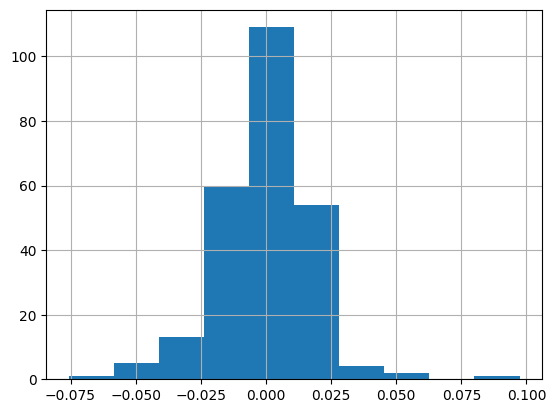

In [7]:
data.log_ret.hist()

#### Volatility

In [8]:
# computing volatility
dates_vol = data.index

data['Vol_GOOGL'] = np.nan
for date in dates_vol[125:]:  # 120 days for 6 months (without weekends)
    data_for_vol = dates_vol[(date - dates_vol < pd.Timedelta(days=180)) & (date - dates_vol >= pd.Timedelta(days=0))]
    data.loc[date, 'Vol_GOOGL'] = np.std(data['log_ret'][data_for_vol].values, ddof=1)*np.sqrt(252) # anualized volatility

data

Ticker,GOOGL,IRX,log_ret,Vol_GOOGL
Date,,,,
2024-03-25,NaN,0.05218,NaN,NaN
2024-03-26,149.953079,0.05218,NaN,NaN
2024-03-27,150.152115,0.05215,0.001326,NaN
2024-03-28,150.211838,0.05203,0.000398,NaN
2024-04-01,154.750153,0.05218,0.029765,NaN
...,...,...,...,...
2025-03-19,163.889999,0.04190,0.019843,0.301438
2025-03-20,162.800003,0.04182,-0.006673,0.300354
2025-03-21,163.990005,0.04185,0.007283,0.299311


In [12]:
# drop  null values
data = data[data['Vol_GOOGL'].notnull()]

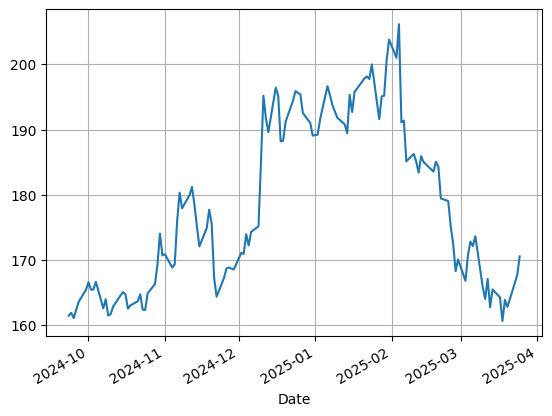

In [13]:
data['GOOGL'].plot()
plt.grid()

<Axes: xlabel='Date'>

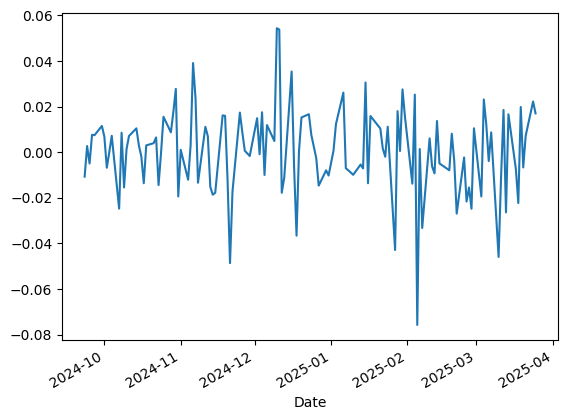

In [15]:
data['log_ret'].plot()

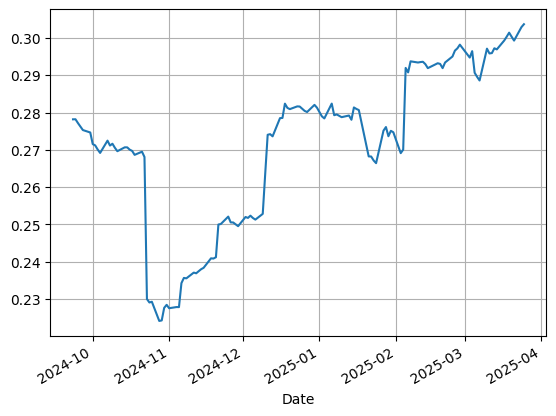

In [14]:
data['Vol_GOOGL'].plot()
plt.grid()

# 4. Modeling with Black-Scholes

The Black-Scholes formula for a European call option is given by (solution to the PDE):
$$
C(S_t, t) = N(d_1) S_t - N(d_2) K e^{-r(T-t)}  
$$
$$
d_1 = \frac{1}{\sigma \sqrt{T-t}} \left[ \ln \left( \frac{S_t}{K} \right) + \left( r + \frac{\sigma^2}{2} \right) (T-t) \right]
$$
$$
d_2 = d_1 - \sigma\sqrt{T-t}
$$

where:

- $ S_t $ is the price of the underlying asset at time $t$.
- $ K $ is the strike price (price you are buying the asset).
- $ r $ is the risk-free interest rate.
- $ T - t $ is the contract's time to expirate.
- $ N(\cdot) $ is the cumulative distribution function of the standard normal distribution.
- $ \sigma^2$ is the standard deviation of the asset subyacent.

## 4.1 Model Definition

In [ ]:
def bys_call(spot: float, 
             strike: float, 
             risk_free: float, 
             vol: float, 
             time: float) -> float:
    """
    Calculates the value of a European call option using the Black-Scholes model.

    Args:
        spot (float): Current price of the underlying asset.
        strike (float): Strike price of the option.
        risk_free (float): Risk-free interest rate (in decimal, e.g., 0.05 for 5%).
        vol (float): Volatility of the underlying asset (in decimal, e.g., 0.2 for 20%).
        tiempo (float): Time to expiration in days.

    Returns:
        float: The theoretical value of the call option. (prime to pay)
    """
    # Convert time from days to years
    time_in_years = time / 360.0

    # Calculate d1 and d2 according to the Black-Scholes formula
    d1 = (np.log(spot / strike) + (risk_free + 0.5 * vol**2) * time_in_years) / (vol * np.sqrt(time_in_years))
    d2 = d1 - vol * np.sqrt(time_in_years)

    # Calculate the call option value using the cumulative distribution function of the normal distribution
    call_value = spot * norm.cdf(d1) - strike * np.exp(-risk_free * time_in_years) * norm.cdf(d2)

    return call_value

## 4.2 Examples of use

In [24]:
data.tail(15)

Ticker,GOOGL,IRX,log_ret,Vol_GOOGL
Date,,,,
2025-03-05,172.820969,0.04205,0.012212,0.290688
2025-03-06,172.151733,0.04197,-0.003880,0.289584
2025-03-07,173.660004,0.04197,0.008723,0.288609
2025-03-10,165.869995,0.04185,-0.045895,0.297149
2025-03-11,164.039993,0.04195,-0.011094,0.295863
2025-03-12,167.110001,0.04197,0.018542,0.295962
2025-03-13,162.759995,0.04188,-0.026376,0.297247
2025-03-14,165.490005,0.04188,0.016634,0.296952
2025-03-17,164.289993,0.04188,-0.007278,0.299328


In [20]:
un_dato = data.iloc[-1,:].copy()
un_dato

Ticker
GOOGL        170.559998
IRX            0.041820
log_ret        0.017030
Vol_GOOGL      0.303704
Name: 2025-03-25 00:00:00, dtype: float64

In [ ]:
bys_call(
    spot = un_dato['GOOGL'], 
    strike = un_dato['GOOGL'] + 10, # 10 dollars above the current price
    risk_free = un_dato['IRX'], 
    vol = un_dato['Vol_GOOGL'], 
    time = 30 # days
)
     

np.float64(2.5468536800489048)

In [26]:
bys_call(
    spot = un_dato['GOOGL'], 
    strike = un_dato['GOOGL'] + 0, # same price
    risk_free = un_dato['IRX'], 
    vol = un_dato['Vol_GOOGL'], 
    time = 30 # days
)
     

np.float64(6.25459665391503)

In [27]:
bys_call(
    spot = un_dato['GOOGL'], 
    strike = un_dato['GOOGL'] - 10, # 10 dollars below the current price
    risk_free = un_dato['IRX'], 
    vol = un_dato['Vol_GOOGL'], 
    time = 30 # days
)
     

np.float64(12.527401517652649)

## 4.2 Apply to all dataset

In [ ]:
data['call_price'] = data.apply(
    lambda x: bys_call(
        spot = x['GOOGL'], 
        strike = x['GOOGL'] + 10, # 10 dollars above the current price
        risk_free = x['IRX'], 
        vol = x['Vol_GOOGL'], 
        time = 30 # days
        ), 
    axis=1
    )


/var/folders/dv/9p478lkj2vs4k52t0dflfcb1qd6rhx/T/ipykernel_49431/546157043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['call_price'] = data.apply(


In [30]:
data.head()

Ticker,GOOGL,IRX,log_ret,Vol_GOOGL,call_price
Date,,,,,
2024-09-23,161.478745,0.04503,-0.010693,0.278190,1.900131
2024-09-24,161.917725,0.04495,0.002715,0.278207,1.911495
2024-09-25,161.119568,0.04487,-0.004942,0.277186,1.875376
2024-09-26,162.356720,0.04468,0.007649,0.276250,1.892577
2024-09-27,163.573929,0.04482,0.007469,0.275313,1.910177


<Axes: >

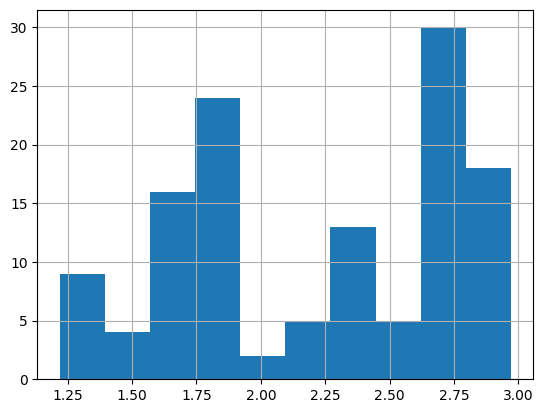

In [33]:
data['call_price'].hist()

<Axes: xlabel='Date'>

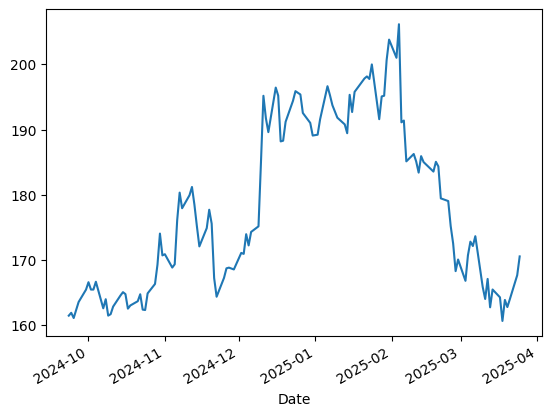

In [ ]:
data['GOOGL'].plot()

<Axes: xlabel='Date'>

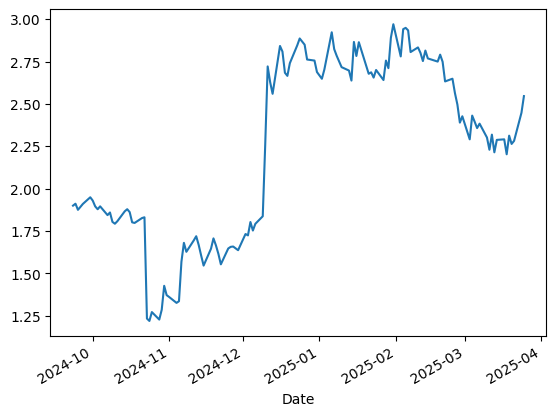

In [35]:
data['call_price'].plot()